In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import math

# def create_radar_chart(labels, datasets, category_names, category_spans, category_colors, fill_models=False, title="Radar Chart", hide_outer_circle=False):

#     num_vars = len(labels)

#     # --- Calculate Angles ---
#     # Angles for the axes (in radians).
#     angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
#     # Angles for plotting data lines (close the loop).
#     plot_angles = angles + angles[:1]
#     # Angle delta between axes
#     delta_angle = 2 * np.pi / num_vars

#     # --- Initialize Plot ---
#     fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))  # Increase size further

#     # --- Styling ---
#     plt.style.use('seaborn-v0_8-whitegrid')
#     font_family = 'sans-serif'
#     plt.rcParams['font.family'] = font_family
    
#     # Turn off all outer spines, including the outermost circle
#     ax.spines['polar'].set_visible(False)

#     # --- Set Axis Limits and Ticks (Range 0-1) ---
#     min_val = 0
#     max_val = 1.0
#     # Important: Set ylim to a higher value to ensure arcs are visible
#     visible_max = max_val + 0.3  # Extend the visible range for arcs
#     ax.set_ylim(min_val, visible_max)
    
#     # --- Add Outer Category Arcs FIRST (moving this section earlier) ---
#     start_angle_idx = 0
#     arc_radius = max_val + 0.15  # Radius for the arc
#     text_radius = arc_radius + 0.15  # Radius for the text label

#     for i, span in enumerate(category_spans):
#         end_angle_idx = start_angle_idx + span
        
#         # Get angles for this category section
#         original_start_angle = angles[start_angle_idx]
#         original_end_angle = angles[(end_angle_idx - 1) % num_vars]
        
#         # Handle wrapping around the circle
#         if original_end_angle < original_start_angle:
#             original_end_angle += 2 * np.pi
            
#         # Add padding for the arcs
#         angle_padding = delta_angle * 0.45
#         arc_start_angle = original_start_angle - angle_padding
#         arc_end_angle = original_end_angle + angle_padding
        
#         # Instead of using matplotlib's line with round caps, create a patch for a straight-edged arc
#         color = category_colors[i]
        
#         # Create arc points
#         arc_theta = np.linspace(arc_start_angle, arc_end_angle, 100)
#         inner_r = arc_radius - 0.12  # Inner radius of the arc
#         outer_r = arc_radius + 0.175  # Outer radius of the arc
        
#         # Create a list of points for the arc patch (straight edges)
#         verts = []
#         # Add points along the outer edge of the arc
#         for t in arc_theta:
#             verts.append((t, outer_r))
#         # Add points along the inner edge of the arc (in reverse)
#         for t in arc_theta[::-1]:
#             verts.append((t, inner_r))
        
#         # Create a polygon patch for the arc with zorder=0 (very back)
#         arc_patch = mpatches.Polygon(verts, closed=True, color=color, alpha=0.5, zorder=0)
#         ax.add_patch(arc_patch)
        
#         start_angle_idx = end_angle_idx % num_vars

#         # Add the category label
#         # Calculate midpoint angle for the category label
#         mid_angle = (arc_start_angle + arc_end_angle) / 2
#         ax.text(
#             mid_angle, text_radius+0.12, category_names[i],
#             ha='center', va='center',
#             fontsize=16, fontweight='bold', color='black',
#             #bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5, edgecolor=color)
#         )

    
#     # Set ticks in the data range
#     yticks = np.linspace(min_val, max_val, 6)  # 0, 0.2, ..., 1.0
#     ax.set_yticks(yticks-0.065)
#     ax.set_yticklabels([f"{i:.1f}" for i in yticks], color="grey", size=10)
    
#     # Move radial labels position
#     ax.set_rlabel_position(0)  # Position at 0 degrees
    
#     # --- Draw the outermost circle (make it bolder) ---
#     theta = np.linspace(0, 2*np.pi, 500)
#     r = np.ones_like(theta)
#     # if not hide_outer_circle:
#     #     ax.plot(theta, r, color='gray', linewidth=2.5, zorder=10)  # Bolder outer circle
    
#     # --- Modify grid appearance ---
#     # Remove default grid
#     ax.grid(False)
    
#     # Manually draw circular grid lines (except the outermost which we drew above)
#     for ytick in yticks[1:-1]:  # Exclude the last tick (1.0) which we drew above
#         ax.plot(theta, np.ones_like(theta) * ytick, color='gray', linestyle='-', linewidth=0.8, alpha=0.3, zorder=10)
#     ax.plot(theta, np.ones_like(theta) * yticks[-1], color='gray', linestyle='-', linewidth=2, alpha=1, zorder=10)

#     # --- Draw axis lines that extend all the way to the center ---
#     # ax.set_ylim(0, max_val)
#     visible_max = max_val + 0.3  # Extend the visible range for arcs
#     ax.set_ylim(0, visible_max)
#     for angle in angles:
#         ax.plot([angle, angle], [0, max_val], color='gray', linestyle='-', linewidth=0.8, alpha=0.5, zorder=10)

#     # --- Plot Multiple Datasets ---
#     prop_cycle = plt.rcParams['axes.prop_cycle']
#     line_colors = prop_cycle.by_key()['color']

#     for i, (name, data) in enumerate(datasets.items()):
#         plot_data = data + data[:1]  # Close the loop
#         color = line_colors[i % len(line_colors)]
#         ax.plot(plot_angles, plot_data, linewidth=2.5, linestyle='solid', color=color, label=name, zorder=15)
#         # Remove filling regardless of fill_models parameter
#         # No fill for model lines per user request

#     # --- Customize Axes Labels ---
#     print("Angles: ", angles)
#     ax.set_xticks(np.array(angles))
#     ax.tick_params(axis='x', pad=-50)  # Reduced padding for labels
#     ax.set_xticklabels(labels, size=14, fontweight='bold', zorder=20)  # Very high zorder for labels

#     # --- Add Title and Legend ---
#     plt.title(title, size=18, weight='bold', y=1.05)
    
#     # Customize the legend with highest zorder
#     legend = ax.legend(
#         loc='upper right', 
#         bbox_to_anchor=(1.25, 1.0),
#         frameon=True,
#         framealpha=0.9,
#         fontsize=16,
#         # zorder=25  # Highest zorder
#     )
#     legend.get_frame().set_edgecolor('lightgray')

#     plt.tight_layout()
    
#     return fig, ax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def create_radar_chart(labels, datasets, category_names, category_spans, category_colors, fill_models=False, title="Radar Chart", hide_outer_circle=False):

    num_vars = len(labels)

    # --- Calculate Angles ---
    # Angles for the axes (in radians).
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # Angles for plotting data lines (close the loop).
    plot_angles = angles + angles[:1]
    # Angle delta between axes
    delta_angle = 2 * np.pi / num_vars

    # --- Initialize Plot ---
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))  # Increase size further

    # --- Styling ---
    plt.style.use('seaborn-v0_8-whitegrid')
    font_family = 'sans-serif'
    plt.rcParams['font.family'] = font_family
    
    # Turn off all outer spines, including the outermost circle
    ax.spines['polar'].set_visible(False)

    # --- Set Axis Limits and Ticks (Range 0-1) ---
    min_val = 0
    max_val = 1.0
    # Important: Set ylim to a higher value to ensure arcs are visible
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(min_val, visible_max)
    
    # --- Add Outer Category Arcs FIRST (moving this section earlier) ---
    start_angle_idx = 0
    arc_radius = max_val + 0.12  # Radius for the arc
    text_radius = arc_radius + 0.15  # Radius for the text label

    for i, span in enumerate(category_spans):
        end_angle_idx = start_angle_idx + span
        
        # Get angles for this category section
        original_start_angle = angles[start_angle_idx]
        original_end_angle = angles[(end_angle_idx - 1) % num_vars]
        
        # Handle wrapping around the circle
        if original_end_angle < original_start_angle:
            original_end_angle += 2 * np.pi
            
        # Add padding for the arcs
        angle_padding = delta_angle * 0.50
        arc_start_angle = original_start_angle - angle_padding
        arc_end_angle = original_end_angle + angle_padding
        
        # Instead of using matplotlib's line with round caps, create a patch for a straight-edged arc
        color = category_colors[i]
        
        # Create arc points
        arc_theta = np.linspace(arc_start_angle, arc_end_angle, 100)
        inner_r = arc_radius - 0.12  # Inner radius of the arc
        outer_r = arc_radius + 0.50  # Outer radius of the arc
        
        # Create a list of points for the arc patch (straight edges)
        verts = []
        # Add points along the outer edge of the arc
        for t in arc_theta:
            verts.append((t, outer_r))
        # Add points along the inner edge of the arc (in reverse)
        for t in arc_theta[::-1]:
            verts.append((t, inner_r))
        
        # Create a polygon patch for the arc with zorder=0 (very back)
        arc_patch = mpatches.Polygon(verts, closed=True, color=color, alpha=0.5, zorder=0)
        ax.add_patch(arc_patch)
        
        start_angle_idx = end_angle_idx % num_vars

        # Add the category label
        # Calculate midpoint angle for the category label
        mid_angle = (arc_start_angle + arc_end_angle) / 2
        ax.text(
            mid_angle, text_radius+0.22, category_names[i],
            ha='center', va='center',
            fontsize=30, fontweight='bold', color='black',
            #bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5, edgecolor=color)
        )

    
    # Set ticks in the data range
    yticks = np.linspace(min_val, max_val, 6)  # 0, 0.2, ..., 1.0
    ax.set_yticks(yticks-0.065)
    ax.set_yticklabels([f"{i:.1f}" for i in yticks], color="grey", size=10)
    
    # Move radial labels position
    ax.set_rlabel_position(0)  # Position at 0 degrees
    
    # --- Draw the outermost circle (make it bolder) ---
    theta = np.linspace(0, 2*np.pi, 500)
    r = np.ones_like(theta)
    # if not hide_outer_circle:
    #     ax.plot(theta, r, color='gray', linewidth=2.5, zorder=10)  # Bolder outer circle
    
    # --- Modify grid appearance ---
    # Remove default grid
    ax.grid(False)
    
    # Manually draw circular grid lines (except the outermost which we drew above)
    for ytick in yticks[1:-1]:  # Exclude the last tick (1.0) which we drew above
        ax.plot(theta, np.ones_like(theta) * ytick, color='gray', linestyle='-', linewidth=0.8, alpha=0.3, zorder=10)
    ax.plot(theta, np.ones_like(theta) * yticks[-1], color='gray', linestyle='-', linewidth=2, alpha=1, zorder=10)

    # --- Draw axis lines that extend all the way to the center ---
    # ax.set_ylim(0, max_val)
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(0, visible_max)
    for angle in angles:
        ax.plot([angle, angle], [0, max_val], color='gray', linestyle='-', linewidth=0.8, alpha=0.5, zorder=10)

    # --- Plot Multiple Datasets ---
    prop_cycle = plt.rcParams['axes.prop_cycle']
    line_colors = prop_cycle.by_key()['color']

    for i, (name, data) in enumerate(datasets.items()):
        plot_data = data + data[:1]  # Close the loop
        color = line_colors[i % len(line_colors)]
        ax.plot(plot_angles, plot_data, linewidth=3.5, linestyle='solid', color=color, label=name, zorder=15)
        # Remove filling regardless of fill_models parameter
        # No fill for model lines per user request

    # --- Customize Axes Labels ---
    print("Angles: ", angles)
    ax.set_xticks(np.array(angles))
    ax.tick_params(axis='x', pad=-60)  # Reduced padding for labels
    ax.set_xticklabels(labels, size=26, fontweight='bold', zorder=20)  # Very high zorder for labels

    # --- Add Title and Legend ---
    # plt.title(title, size=18, weight='bold', y=1.05)
    
    # Customize the legend with highest zorder
    # legend = ax.legend(
    #     loc='upper right', 
    #     bbox_to_anchor=(1.25, 1.0),
    #     frameon=True,
    #     framealpha=0.9,
    #     fontsize=16,
    #     # zorder=25  # Highest zorder
    # )
    # legend.get_frame().set_edgecolor('lightgray')

    plt.tight_layout()
    
    return fig, ax

In [2]:
# 1. Define Labels
doc_elements = ["0", f"1",">1"]
layout = ["In-Page", "Out-Page"]
nlp_entities = ["Num.", "Temp.", "Misc", "Location", "Struct."]
all_labels = doc_elements + layout + nlp_entities

In [3]:
# 2. Define Category Names, Spans, and Colors
category_names = ["Document\nElement", "Layout", "NLP\nEntity Type"]
category_spans = [len(doc_elements), len(layout), len(nlp_entities)]
category_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

In [4]:
all_labels

['0',
 '1',
 '>1',
 'In-Page',
 'Out-Page',
 'Num.',
 'Temp.',
 'Misc',
 'Location',
 'Struct.']

In [5]:
# 3. Provide Sample Data
datasets_example = {
    'Molmo 7B':         [],
    'Ovis 1.6 9B':      [],
    'DocOwl 2':         [],
    'Phi 3.5':          [],
    'Qwen 2.5 7B':      [],
    'InternVL 2.5 8B':  [],
    'Llama 3.2 11B':    [],
    'Gemma 3 27B':      [],
    'Llava 1.6 34B':    [],
}

In [6]:
order_colums=["Molmo","Ovis","DocOwl","Phi","Qwen","InternVL","Llama","Gemma27","Llava34"]

In [7]:
# read results/QUR_DE.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read results/QUR_DE.csv
df = pd.read_csv('results_w1/results/UR_PAGE_DED.csv', index_col=0)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
0,0.760962,0.838755,0.290665,0.574965,0.881188,0.826733,0.771570,0.869165,0.725601
1,0.793922,0.769231,0.216524,0.533713,0.888889,0.758784,0.823362,0.807217,0.699905
>1,0.817391,0.666667,0.252174,0.391304,0.857971,0.747826,0.811594,0.802899,0.657971


In [8]:
# add first row to datasets_example

for i, row in df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1
datasets_example

{'Molmo 7B': [0.7609618104667609, 0.7939221272554606, 0.8173913043478261],
 'Ovis 1.6 9B': [0.8387553041018387, 0.7692307692307693, 0.6666666666666666],
 'DocOwl 2': [0.2906647807637906, 0.2165242165242165, 0.2521739130434782],
 'Phi 3.5': [0.574964639321075, 0.533713200379867, 0.391304347826087],
 'Qwen 2.5 7B': [0.8811881188118812, 0.8888888888888888, 0.8579710144927536],
 'InternVL 2.5 8B': [0.8267326732673267,
  0.7587844254510921,
  0.7478260869565218],
 'Llama 3.2 11B': [0.7715700141442716, 0.8233618233618234, 0.8115942028985508],
 'Gemma 3 27B': [0.8691654879773691, 0.8072174738841406, 0.8028985507246377],
 'Llava 1.6 34B': [0.7256011315417256, 0.6999050332383666, 0.6579710144927536]}

In [9]:
df = pd.read_csv('results_w1/results/UR_PAGE_inpage.csv', index_col=0)
df = df.sort_index(ascending=True)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
UR_inpage,0.620306,0.638387,0.168289,0.418637,0.799722,0.596662,0.638387,0.757997,0.705146
UR_inpage_C1,0.695312,0.718750,0.175781,0.457031,0.855469,0.589844,0.734375,0.835938,0.718750
UR_inpage_C2,0.581538,0.550769,0.163077,0.396923,0.766154,0.563077,0.590769,0.698462,0.716923
UR_inpage_C3,0.572464,0.695652,0.166667,0.398551,0.775362,0.688406,0.572464,0.753623,0.652174


In [10]:
for i, row in df.iterrows():
    # print(i,row.values)
    if i == "UR_inpage":
        idx=0
        for k,v in datasets_example.items():
            v.append(row.values[idx])
            idx+=1

In [11]:
df = pd.read_csv('results_w1/results/UR_PAGE_outpage.csv', index_col=0)
df = df.sort_index(ascending=True)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
UR_outpage,0.835165,0.844243,0.289059,0.577640,0.909221,0.858576,0.849976,0.865265,0.708552
UR_outpage_C1,0.856287,0.833084,0.310629,0.538922,0.910180,0.847305,0.866018,0.855539,0.705090
UR_outpage_C2,0.774067,0.860511,0.275049,0.632613,0.903733,0.876228,0.809430,0.903733,0.736739
UR_outpage_C3,0.846774,0.870968,0.201613,0.673387,0.915323,0.883065,0.846774,0.838710,0.669355


In [12]:
for i, row in df.iterrows():
    # print(i,row.values)
    if i == "UR_outpage":
        idx=0
        for k,v in datasets_example.items():
            v.append(row.values[idx])
            idx+=1

In [13]:
datasets_example

{'Molmo 7B': [0.7609618104667609,
  0.7939221272554606,
  0.8173913043478261,
  0.6203059805285118,
  0.8351648351648352],
 'Ovis 1.6 9B': [0.8387553041018387,
  0.7692307692307693,
  0.6666666666666666,
  0.6383866481223922,
  0.8442427138079311],
 'DocOwl 2': [0.2906647807637906,
  0.2165242165242165,
  0.2521739130434782,
  0.168289290681502,
  0.2890587673196368],
 'Phi 3.5': [0.574964639321075,
  0.533713200379867,
  0.391304347826087,
  0.4186369958275382,
  0.577639751552795],
 'Qwen 2.5 7B': [0.8811881188118812,
  0.8888888888888888,
  0.8579710144927536,
  0.799721835883171,
  0.9092212135690396],
 'InternVL 2.5 8B': [0.8267326732673267,
  0.7587844254510921,
  0.7478260869565218,
  0.5966620305980529,
  0.8585762064022934],
 'Llama 3.2 11B': [0.7715700141442716,
  0.8233618233618234,
  0.8115942028985508,
  0.6383866481223922,
  0.849976110845676],
 'Gemma 3 27B': [0.8691654879773691,
  0.8072174738841406,
  0.8028985507246377,
  0.7579972183588317,
  0.8652651696129957],
 'L

In [14]:
df = pd.read_csv('results_w1/results/UR_NLPE.csv', index_col=0)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
NUMERIC,0.820388,0.799029,0.278641,0.595146,0.890291,0.801942,0.829126,0.835922,0.714563
TEMPORAL,0.944056,0.896853,0.304196,0.587413,0.970280,0.921329,0.949301,0.849650,0.774476
ENTITY,0.667666,0.775612,0.230885,0.494753,0.828586,0.770615,0.702149,0.829085,0.656672
LOCATION,0.808752,0.703404,0.194489,0.581848,0.904376,0.722853,0.752026,0.824959,0.748784
STRUCTURE,0.681818,0.732323,0.111111,0.540404,0.843434,0.717172,0.777778,0.767677,0.782828


In [15]:
for i, row in df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1

In [16]:
for k,v in datasets_example.items():
    print(k,"\t",len(v),v)

Molmo 7B 	 10 [0.7609618104667609, 0.7939221272554606, 0.8173913043478261, 0.6203059805285118, 0.8351648351648352, 0.8203883495145631, 0.944055944055944, 0.6676661669165417, 0.8087520259319287, 0.6818181818181818]
Ovis 1.6 9B 	 10 [0.8387553041018387, 0.7692307692307693, 0.6666666666666666, 0.6383866481223922, 0.8442427138079311, 0.7990291262135922, 0.8968531468531469, 0.7756121939030485, 0.7034035656401945, 0.7323232323232324]
DocOwl 2 	 10 [0.2906647807637906, 0.2165242165242165, 0.2521739130434782, 0.168289290681502, 0.2890587673196368, 0.2786407766990291, 0.3041958041958042, 0.2308845577211394, 0.1944894651539708, 0.1111111111111111]
Phi 3.5 	 10 [0.574964639321075, 0.533713200379867, 0.391304347826087, 0.4186369958275382, 0.577639751552795, 0.5951456310679611, 0.5874125874125874, 0.4947526236881559, 0.5818476499189628, 0.5404040404040404]
Qwen 2.5 7B 	 10 [0.8811881188118812, 0.8888888888888888, 0.8579710144927536, 0.799721835883171, 0.9092212135690396, 0.8902912621359224, 0.97027

In [17]:
# remove DocOwl and Molmo from datasets_example
# datasets_example.pop('DocOwl 2')
# datasets_example.pop('Molmo 7B')

Angles:  [0.0, 0.6283185307179586, 1.2566370614359172, 1.8849555921538759, 2.5132741228718345, 3.141592653589793, 3.7699111843077517, 4.39822971502571, 5.026548245743669, 5.654866776461628]


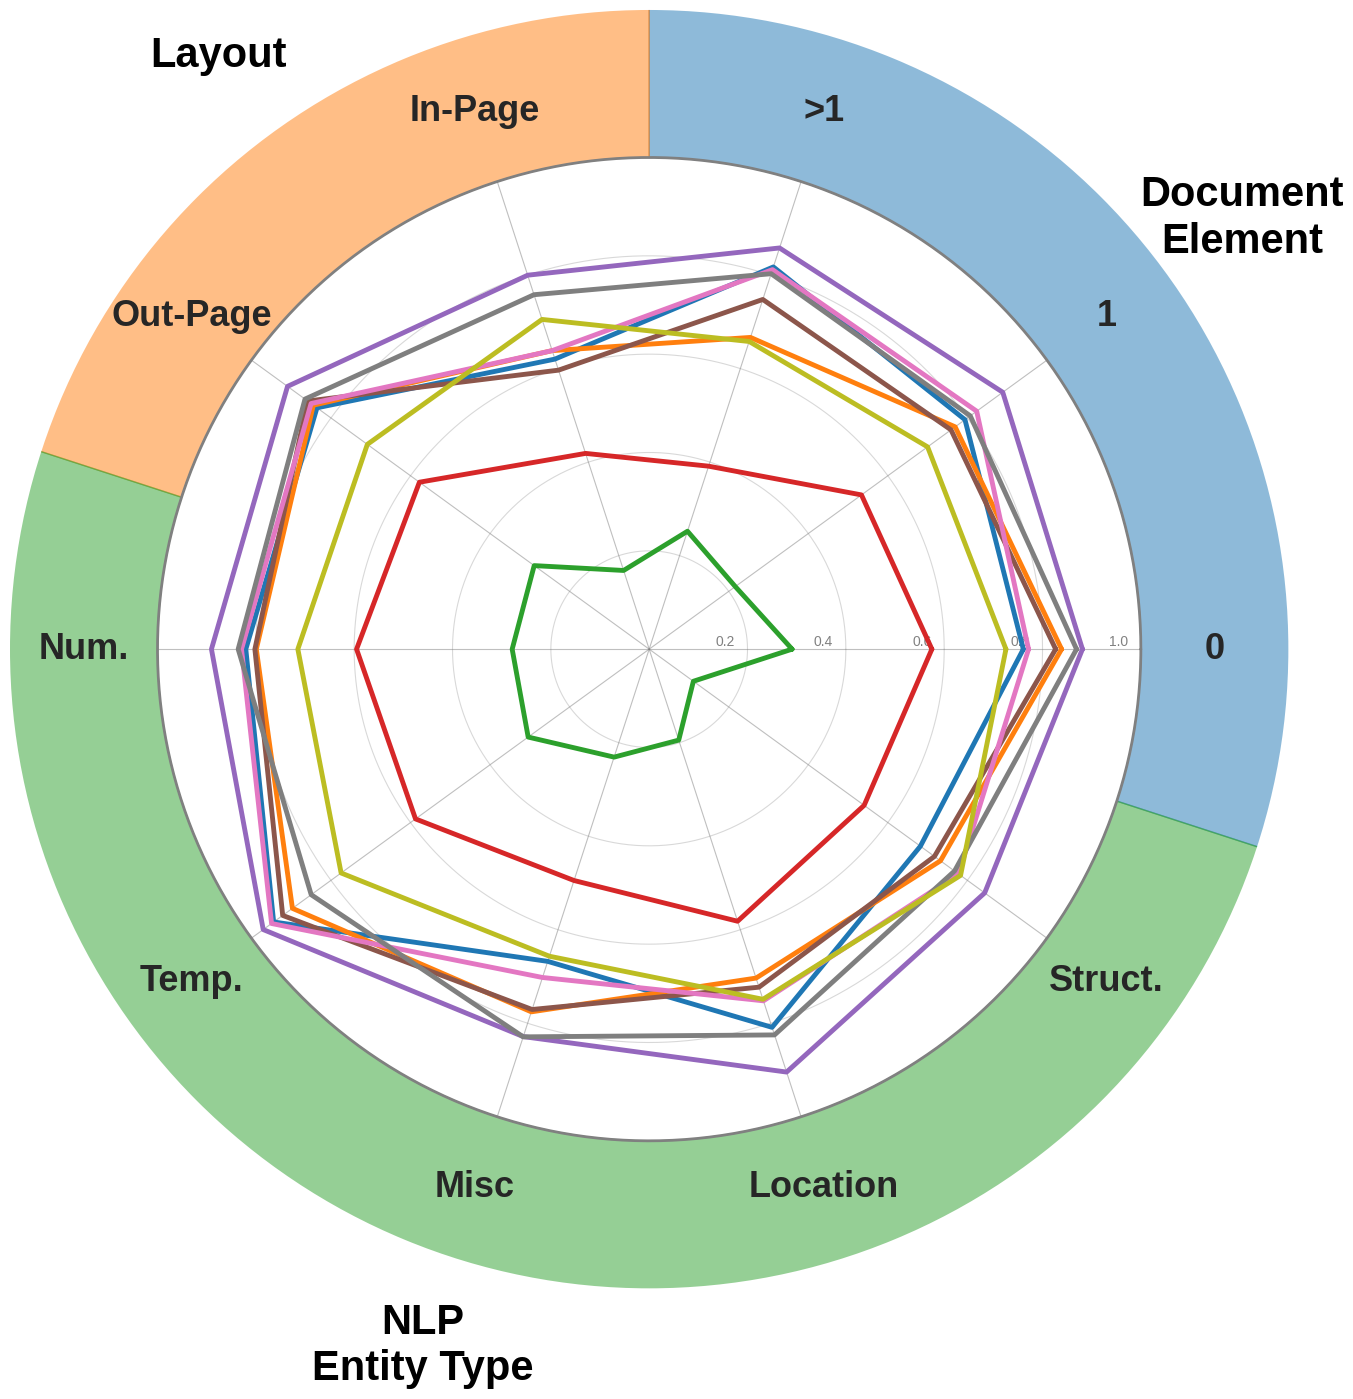

In [21]:
# 4. Generate the plot
try:
    fig, ax = create_radar_chart(
        labels=all_labels,
        datasets=datasets_example,
        category_names=category_names,
        category_spans=category_spans,
        category_colors=category_colors,
        fill_models=False,  # No fill as requested
        title=""
    )
    
    # Save the figure if needed
    dpi=300
    plt.savefig('MPDocVQA_UR_RADAR_UP.svg', dpi=dpi, bbox_inches='tight')
    # plt.savefig('radar_chart.png', dpi=300, bbox_inches='tight')
    
    plt.show()
except ValueError as e:
    print(f"Error creating chart: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
# 

In [ ]:
# 